# **Etapa 1**: Ambiente

## Importação das Bibliotecas

Aqui fizemos a importação das duas bibliotecas requeridas pelo **Desafio**, Pandas e Matplotlib com *alias* de pd e plt. Outras bibliotecas podem ser importadas, mas essas duas são obrigatórias, um requerimento do próprio **Desafio**.

In [128]:
# bibliotecas obrigatórias para o Desafio
import pandas as pd
import matplotlib.pyplot as plt

# bibliotecas opcionais
import numpy as np

## Importação do Dataset

O que gostamos de fazer sempre é examinar o estado do dataset, o que inclui entender a dimensão do dataset em linhas e colunas, procurar por dados faltantes, dados duplicados e os tipos dos dados.

Documentação:
- read_csv
    - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

- head
    - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html#pandas.DataFrame.head

In [129]:
df_raw = pd.read_csv('./googleplaystore.csv')
df_raw.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Usamos shape para retornar uma tupla com a dimensão dos dados, que podem ser acessados posicionalmente, 0 para linhas e 1 para colunas

Documentação:
- shape
    - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html

In [130]:
print('O dataset possui {} linhas e {} colunas'.format(df_raw.shape[0], df_raw.shape[1]))

O dataset possui 10841 linhas e 13 colunas


Utilizamos a função isna() para retornar uma lista com os dados faltantes e junto com a função sum(), somamos esses dados faltantes. Quando usado em conjunto com mais um uso da função sum() obtemos o valor absoluto de dados faltantes no dataset.

Documentação:
- isna
    - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html#pandas.DataFrame.isna
- sum
    - https://docs.python.org/3.11/library/functions.html#sum

In [131]:
df_raw.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [132]:
print('O dataset possui {} dados faltantes'.format(df_raw.isna().sum().sum()))

O dataset possui 1487 dados faltantes


Utilizamos a função duplicated() para retornar uma lista com valores booleanos com as linhas que possuem dados duplicados, e quando encadeado com a função sum() obtemos o valor absoluto dessas linhas.

Documentação:
- duplicated
    - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html#pandas.DataFrame.duplicated

In [133]:
print('O dataset possui {} linhas duplicadas'.format(df_raw.duplicated().sum()))

O dataset possui 483 linhas duplicadas


Por fim, utilizamos dtypes para obter os tipos dos dados. Observamos que apenas a coluna Rating possui dados do tipo 'float', enquanto todas as outras colunas são do tipo 'string'. Isso pode oferecer um desafio mais tarde e conversões podem ser necessárias.

Documentação:
- dtypes
    - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html#pandas.DataFrame.dtypes

In [134]:
df_raw.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# **Etapa 2**: Desenvolvimeto

## 1 - Remova as linhas duplicadas;

Para cada passo dessa etapa, faremos uma cópia do dataframe com a finalidade de ser prático na recuperação do estado dos dados se fizermos alguma transformação e precisarmos desfazer ela. Ao invés de refazermos a ingestão dos dados e rodar o código célula por célula, podemos só retornar ao início de cada tarefa dessa etapa e voltar para essa cópia.

Documentação:
- copy
    - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html#pandas.DataFrame.copy

In [135]:
df1 = df_raw.copy()

Aqui estamos conferindo a dimensão dos dados antes de eliminarmos os dados duplicados.

In [136]:
df1.shape

(10841, 13)

Eliminamos os dados duplicados com a função drop_duplicates() sinalizando o inplace como True para que a eliminação seja duradoura no dataframe df1.

Documentação:
- drop_duplicates
    - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html#pandas.DataFrame.drop_duplicates

In [137]:
df1.drop_duplicates(inplace=True)

### **Remover Linhas Pela Regra de Negócio**

Pela regra de negócios, ficou combinado que apenas retirar as duplicatas não bastava, no caso de aplicativos com o mesmo nome, devemos manter os aplicativos com um maior número de instalação. Portanto, além de retirar os aplicativos cujo os valores estão inteiramente duplicados, vamos consultar quais aplicativos possuem o mesmo nome, mas números de instalações diferentes e manter aqueles que tiverem o maior número de instalação.

**Isso não vai eliminar inteiramente o problema de duplicatas** mas o time de negócios pode querer manter esses registros, onde apps com o mesmo nome possuem registro diferentes por várias razões: os aplicativos podem ter passado por mudanças significativas, e apesar da natureza deles não ter sido modificada, agora eles podem estar em uma nova categoria, ou pode ter sido adicionado um método de pagamento para aplicativos que antes eram gratuitos (e o time de negócios quer acompanhar a mudança de padrões de reviews e instalações desse aplicativo). Enfim, nossa tarefa aqui é simples.

Utilizamos value_count() para obter a quantidade de valores na coluna 'Installs'. Como é possível observar essa é uma coluna categórica, que não registra o número de instalação dos apps com precisão, mas registra em categorias de unidades, dezenas, centenas, milhares, dezenas de milhares, centenas de milhares, etc. Vamos precisar limpar e converter essa coluna.

Documentação:
- value_counts
    -  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html#pandas.DataFrame.value_counts

In [138]:
df1['Installs'].value_counts()

Installs
1,000,000+        1488
10,000,000+       1132
100,000+          1129
10,000+           1033
1,000+             890
100+               710
5,000,000+         683
500,000+           517
50,000+            474
5,000+             469
10+                385
100,000,000+       369
500+               328
50,000,000+        272
50+                204
5+                  82
1+                  67
500,000,000+        61
1,000,000,000+      49
0+                  14
0                    1
Free                 1
Name: count, dtype: int64

Existe um dado registrado como 'Free', o que nos leva a crer que foi um erro na exportação desses dados para o arquivo .csv, podemos arrancar ele fora ou podemos entender qual o problema. O item 10472 deveria ter recebido um valor faltante em categoria, então a solução é jogar todos os dados para a próxima categoria com a ajuda da biblioteca NumPy. Por um lado **a nossas regra de negócio não nos informa se esse problema é prioritário**, de modo que poderíamos só apagar esse registro, por outro lado, como é apenas uma única linha, isso não representa um grande gasto de tempo ou energia, de modo que optamos por formatar a linha do registro. 

Documentação:
- loc
    - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html
- Biblioteca NumPy
    - https://numpy.org/
- adicionando valor NaN com NumPy
    - https://numpy.org/doc/stable/reference/constants.html#numpy.nan

In [139]:
free = df1.loc[10472].copy()
correcao = [free['App']] + [np.nan] + list(free[1:].values)[:-1]
df1.loc[10472] = correcao

/tmp/ipykernel_9811/2926383551.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.9' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df1.loc[10472] = correcao


Agora vamos precisar limpar a coluna retirando o sinal gráfico de '+' e convertendo ela para inteiro.

Documentação:
- replace
    - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html#pandas.DataFrame.replace
- convertendo os tipos de dados com astype
    - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html#pandas.DataFrame.astype

In [140]:
df1['Installs'] = df1['Installs'].str.replace('+', '').str.replace(',', '').astype(int)

Finalmente, agora precisamos eliminar os aplicativos que possuem o mesmo nome, mas valores diferentes na coluna 'Install' para que eliminemos as versões com menores valores. Para conseguirmos isso, agrupamos os valores de 'App' e pedimos os maiores valores na coluna 'Installs' com a função idxmax. Fizemos o reset_index para resetarmos o índice do dataframe depois de tantas mudanças.

Documentação:
- groupby
    - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html#pandas.DataFrame.groupby
- idxmax
    - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmax.html#pandas.DataFrame.idxmax

In [141]:
df1 = df1.loc[df1.groupby('App')['Installs'].idxmax()].reset_index(drop=True)

Conferimos novamente a dimensão dos dados e constatamos que o número total de linhas foi afetado, mostrando que a eliminação de dados duplicados foi efetiva. Usamos a função duplicated() e sum() para conferir se há ainda dados duplicados no dataframe df1.

In [142]:
df1.shape

(9660, 13)

In [143]:
df1.duplicated().sum()

np.int64(0)

## 2 - Faça um gráfico de barras contendo os top 5 apps por número de instalação;

In [148]:
df2 = df1.copy()

In [152]:
df2['Installs'].value_counts()

Installs
1000000       1417
100000        1113
10000         1030
10000000       937
1000           888
100            709
5000000        607
500000         504
50000          469
5000           468
10             385
500            328
50             204
50000000       204
100000000      189
5               82
1               67
500000000       24
1000000000      20
0               15
Name: count, dtype: int64

A limpeza e a conversão foi realizada na questão 1, vamos criar um dataframe auxiliar que vai conter uma lista ordenada com a função sort_values e que vai ser limitada a um top 5, selecionada com a função head, para daí e plotar o gráfico com a biblioteca Matplotlib.

Em tempo, **essa seleção infelizmente não reflete o top 5 aplicativos por número de instalação**. E a razão é que a coluna 'Installs', apesar de ter sido limpa e tratada, ainda possui uma natureza categórica. Ela não traz informações detalhadas pelo número de Instalações e esse top 5 que trouxemos abaixo nada mais é que os **5 primeiros aplicativos em ordem alfabética** com o valor máximo na coluna Installs (a categoria de 1000000000 installs possui 20 apps contando com esses 5 abaixo). Esse é um problema que em uma situação real deve ser trazida e discutida com o time técnico e com o time de negócios. Para fins desse desafio, contudo, nós consideramos que a tarefa está feita dentro das nossas capacidades atuais:

Documentação:
- sort_values
    - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values

In [153]:
df_aux = df2.sort_values('Installs', ascending=False).head()
df_aux

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4328,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
5399,Instagram,SOCIAL,4.5,66577313,Varies with device,1000000000,Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
4924,Google Drive,PRODUCTIVITY,4.4,2731171,Varies with device,1000000000,Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
4940,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,Varies with device,1000000000,Free,0,Teen,Video Players & Editors,"August 6, 2018",Varies with device,Varies with device
4869,Gmail,COMMUNICATION,4.3,4604324,Varies with device,1000000000,Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device


Para plotar o gráfico em barras utilizamos a função figure para ajustar o tamanho do gráfico, bar para selecionar o gráfico em barras que é requisitado na questão, title para nomer o gráfico, xlaber e ylabel para nomear os eixos x e y, e show para plotar o gráfico final:

- figure
    - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
- bar
    - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar
- title
    - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html#matplotlib.pyplot.title
- xlabel
    - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html#matplotlib.pyplot.xlabel
- ylabel
    - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html#matplotlib.pyplot.ylabel
- show
    - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html#matplotlib.pyplot.show

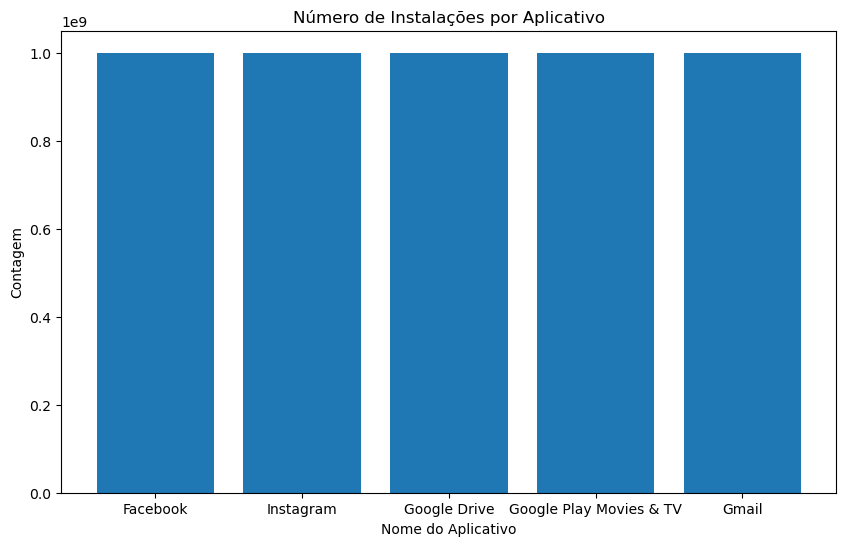

In [154]:
plt.figure(figsize=(10, 6))
plt.bar(df_aux['App'], df_aux['Installs'])
plt.title('Número de Instalações por Aplicativo')
plt.xlabel('Nome do Aplicativo')
plt.ylabel('Contagem')
plt.show()

# Etapa 3
## Faça um gráfico de pizza (pie chart) mostrando as categorias de apps existentes no dataset de acordo com a frequência em que elas aparecem;

In [155]:
df3 = df2.copy()

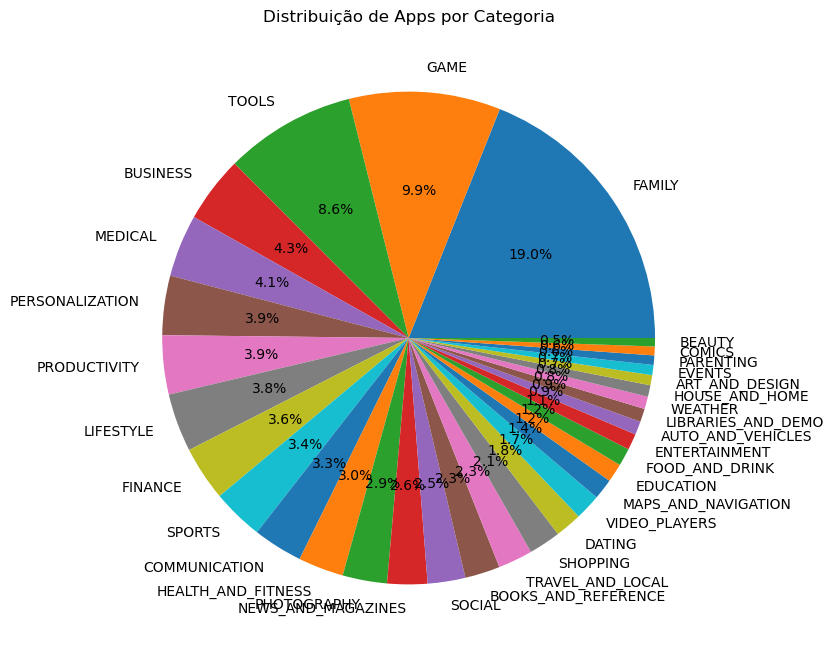

In [ ]:
df_aux = df3['Category'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(df_aux, labels=df_aux.index, autopct='%.1f%%')
plt.title('Distribuição de Apps por Categoria')
plt.show()

In [157]:
df_aux = df3.copy()
df_aux['Category'].value_counts()

Category
FAMILY                 1832
GAME                    960
TOOLS                   829
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  170
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               118
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           73
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64

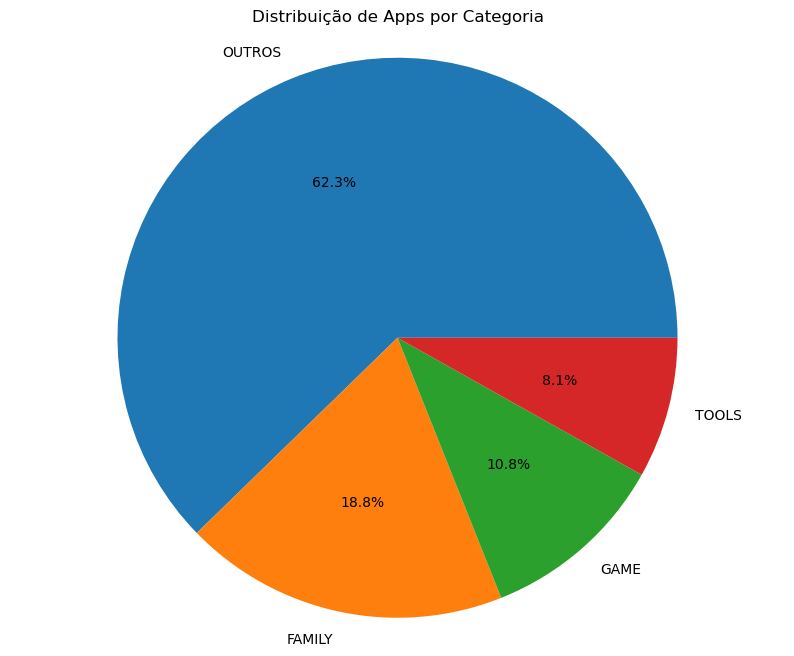

In [280]:
contagem = aux['Category'].value_counts()

categorias_principais = contagem[contagem >= 800].index

aux['Categoria Agrupada'] = aux['Category'].apply(lambda x: x if x in categorias_principais else 'OUTROS')

contagem_agrupada = aux['Categoria Agrupada'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(
    contagem_agrupada,
    labels=contagem_agrupada.index,
    autopct='%.1f%%',
)
plt.title('Distribuição de Apps por Categoria')
plt.axis('equal')
plt.show()

# Etapa 4
## Mostre qual o app mais caro existente no dataset;

In [281]:
df4 = df3.copy()

In [282]:
df4.loc[df4['Price'] == 'Free', 'Price'] = 0
df4['Price'] = df4['Price'].str.replace('$', '').astype(float)

In [283]:
df_aux2 = df4.sort_values('Price', ascending=False).head()
df_aux2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1.8M,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26M,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7M,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22M,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up


In [284]:
df4.loc[df4['Price'] == df4['Price'].max()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up


# Etapa 5
## Mostre quantos apps são classificados como '**Mature 17**';

In [285]:
df5 = df4.copy()

In [ ]:
contagem = (df5['Content Rating'] == 'Mature 17+').sum()
print(f'{contagem} apps têm o Content Rating Mature 17+.')

447 apps tem o Content Rating Mature 17+.


# Etapa 6
## Mostre o top 10 apps por número de reviews bem como o respectivo número de reviews. Ordene a lista de forma decrescente por número de reviews;

In [287]:
df6 = df5.copy()

In [288]:
df6['Reviews'] = df6['Reviews'].astype(int)

In [294]:
df_aux = df6.sort_values('Reviews', ascending=False).head(10).sort_index().reset_index(drop=True)
df_aux[['App', 'Reviews']]

,App,Reviews
0,Messenger – Text and Video Chat for Free,56642847
1,WhatsApp Messenger,69119316
2,Messenger – Text and Video Chat for Free,56646578
3,Clash of Clans,44893888
4,Facebook,78158306
5,Instagram,66577313
6,Instagram,66577446
7,WhatsApp Messenger,69109672
8,Instagram,66509917
9,Facebook,78128208


# Etapa 7
## Crie pelo menos mais 2 cálculos sobre o dataset e apresente um em formato de lista e outro em formato de valor. Por exemplo: "top 10 apps por número de reviews" e "o app mais caro existente no dataset";

### Formato de Lista

### Formato de Valor

# Etapa 8
## Crie pelo menos outras 2 formas gráficas de exibição dos indicadores acima utilizando a biblioteca **Matplotlib**.